In [11]:
# program to merge the yelp cleaned data set of restaurants' review and merge it with population density
# data source:
# Yelp = https://www.yelp.com/dataset/ 
# Population = United States Census Bureau and USGS = https://simplemaps.com/data/us-cities

In [40]:
# import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# create dataframe using the yelp csv and the consensus population csv
yelp_df = pd.read_csv("Output\yelp_restaurants.csv")
yelp_df.head()


,Name,Categories,Address,City,State,ZIP,Is Open,Total Reviews,Star Rating,Business Accepts Credit Cards,Alcohol,Noise Level,Restaurants Good For Groups,Restaurants Reservations,Latitude,Longitude
0,Emerald Chinese Restaurant,"Specialty Food, Restaurants, Dim Sum, Imported...",30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,Yes,128,2.5,NaN,Full Bar,Loud,True,True,43.605499,-79.652289
1,Musashi Japanese Restaurant,"Sushi Bars, Restaurants, Japanese","10110 Johnston Rd, Ste 15",Charlotte,NC,28210,Yes,170,4.0,True,Beer and Wine,Average,True,True,35.092564,-80.859132
2,Taco Bell,"Restaurants, Breakfast & Brunch, Mexican, Taco...",2450 E Indian School Rd,Phoenix,AZ,85016,Yes,18,3.0,True,None,NaN,True,False,33.495194,-112.028588
3,Marco's Pizza,"Italian, Restaurants, Pizza, Chicken Wings",5981 Andrews Rd,Mentor-on-the-Lake,OH,44060,Yes,16,4.0,True,None,NaN,True,False,41.708520,-81.359556
4,Carluccio's Tivoli Gardens,"Restaurants, Italian","1775 E Tropicana Ave, Ste 29",Las Vegas,NV,89119,No,40,4.0,True,Full Bar,Quiet,True,True,36.100016,-115.128528


In [14]:
yelp_df.count()

Name                             59387
Categories                       59387
Address                          58971
City                             59387
State                            59387
ZIP                              59285
Is Open                          59387
Total Reviews                    59387
Star Rating                      59387
Business Accepts Credit Cards    34388
Alcohol                          44322
Noise Level                      41046
Restaurants Good For Groups      50963
Restaurants Reservations         50411
Latitude                         59387
Longitude                        59387
dtype: int64

In [15]:
# create dataframe using the yelp csv and the consensus population csv
census_df = pd.read_csv("uscitiesv1.4.csv")
census_df.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,population_proper,density,source,incorporated,timezone,zips,id
0,Prairie Ridge,Prairie Ridge,WA,Washington,53053,Pierce,47.1443,-122.1408,NaN,NaN,1349.8,polygon,False,America/Los_Angeles,98360 98391,1840037882
1,Edison,Edison,WA,Washington,53057,Skagit,48.5602,-122.4311,NaN,NaN,127.4,polygon,False,America/Los_Angeles,98232,1840017314
2,Packwood,Packwood,WA,Washington,53041,Lewis,46.6085,-121.6702,NaN,NaN,213.9,polygon,False,America/Los_Angeles,98361,1840025265
3,Wautauga Beach,Wautauga Beach,WA,Washington,53035,Kitsap,47.5862,-122.5482,NaN,NaN,261.7,point,False,America/Los_Angeles,98366,1840037725
4,Harper,Harper,WA,Washington,53035,Kitsap,47.5207,-122.5196,NaN,NaN,342.1,point,False,America/Los_Angeles,98366,1840037659


In [28]:
# clean the census data 
# update the columns of the census dataframe

census_clean_df = census_df.rename(columns={'city':'City', 'state_id': 'State', 'state_name': 'State Name', 
                                            'density':'Density /SqKm', 'zips':'Population ZIPS'})

# remove selected columns
census_cleaner_df = census_clean_df[['City', 'State', 'State Name', 
                                    'Density /SqKm', 'Population ZIPS']]

census_cleaner_df.head(3)

,City,State,State Name,Density /SqKm,Population ZIPS
0,Prairie Ridge,WA,Washington,1349.8,98360 98391
1,Edison,WA,Washington,127.4,98232
2,Packwood,WA,Washington,213.9,98361


In [29]:
# merge the two dataframes to get the population density into the restaurants data 
yelp_density_df = pd.merge(yelp_df, census_cleaner_df, on=['City','State'], how='left')

yelp_density_df.head(3)


,Name,Categories,Address,City,State,ZIP,Is Open,Total Reviews,Star Rating,Business Accepts Credit Cards,Alcohol,Noise Level,Restaurants Good For Groups,Restaurants Reservations,Latitude,Longitude,State Name,Density /SqKm,Population ZIPS
0,Emerald Chinese Restaurant,"Specialty Food, Restaurants, Dim Sum, Imported...",30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,Yes,128,2.5,NaN,Full Bar,Loud,True,True,43.605499,-79.652289,NaN,NaN,NaN
1,Musashi Japanese Restaurant,"Sushi Bars, Restaurants, Japanese","10110 Johnston Rd, Ste 15",Charlotte,NC,28210,Yes,170,4.0,True,Beer and Wine,Average,True,True,35.092564,-80.859132,North Carolina,1065.0,28269 28262 28105 28280 28282 28209 28208 2820...
2,Taco Bell,"Restaurants, Breakfast & Brunch, Mexican, Taco...",2450 E Indian School Rd,Phoenix,AZ,85016,Yes,18,3.0,True,None,NaN,True,False,33.495194,-112.028588,Arizona,1204.0,85008 85009 85003 85006 85007 85004 85083 8508...


In [33]:
yelp_density_df.count()

yelp_density_df['State'].nunique()

26

In [37]:
# filter the data to show only for open restaurants
yelp_density_filtered_df = yelp_density_df.loc[yelp_density_df['Is Open']=="Yes"]

yelp_density_filtered_df.count()
# yelp_density_filtered_df['State'].nunique()
# yelp_density_filtered_df.nunique()

Name                             42252
Categories                       42252
Address                          41928
City                             42252
State                            42252
ZIP                              42162
Is Open                          42252
Total Reviews                    42252
Star Rating                      42252
Business Accepts Credit Cards    24181
Alcohol                          31310
Noise Level                      29296
Restaurants Good For Groups      36220
Restaurants Reservations         36519
Latitude                         42252
Longitude                        42252
State Name                       24706
Density /SqKm                    24706
Population ZIPS                  24706
dtype: int64

In [39]:
# Take only records which do not have blank population density 
yelp_density_final_df = yelp_density_filtered_df.dropna(subset=['Density /SqKm'])

yelp_density_final_df.count()

Name                             24706
Categories                       24706
Address                          24442
City                             24706
State                            24706
ZIP                              24668
Is Open                          24706
Total Reviews                    24706
Star Rating                      24706
Business Accepts Credit Cards    23273
Alcohol                          19593
Noise Level                      18019
Restaurants Good For Groups      21793
Restaurants Reservations         22030
Latitude                         24706
Longitude                        24706
State Name                       24706
Density /SqKm                    24706
Population ZIPS                  24706
dtype: int64

In [43]:
# find the total number of cities 
yelp_density_final_df['City'].nunique()

336

In [61]:
# find the median ratings aggregated per city and sum of total reviews as well 
# create a group opject for the final dataset 
yelp_density_grp = yelp_density_final_df.groupby(['City', 'State', 'Density /SqKm'])

In [62]:
# find the median ratings aggregated per city 
median_ratings = yelp_density_grp['Star Rating'].median()

# find the sum of total reviews 
total_reviews_sum = yelp_density_grp['Total Reviews'].sum()

# use the above aggregates to create a summarized dataframe 
yelp_density_agg_df = pd.DataFrame({'Ratings Median': median_ratings, 
                                    'Total Reviews': total_reviews_sum
                                   })

In [63]:
yelp_density_agg_df.reset_index(inplace=True)

In [64]:
yelp_density_agg_df

,City,State,Density /SqKm,Ratings Median,Total Reviews
0,Akron,OH,1230.0,3.50,6151
1,Alburg,VT,173.8,5.00,5
2,Aliquippa,PA,837.0,3.50,3
3,Allison Park,PA,599.0,3.50,533
4,Ambridge,PA,1763.0,4.25,258
5,Amherst,OH,660.0,3.50,905
6,Anthem,AZ,562.2,3.50,531
7,Apache Junction,AZ,440.0,2.00,160
8,Arnold,PA,2604.0,4.00,48
9,Aspinwall,PA,3017.0,3.50,74


In [88]:
# save the aggregated data to CSV
yelp_density_agg_df.to_csv("Output/yelp_density_agg.csv", index=False)

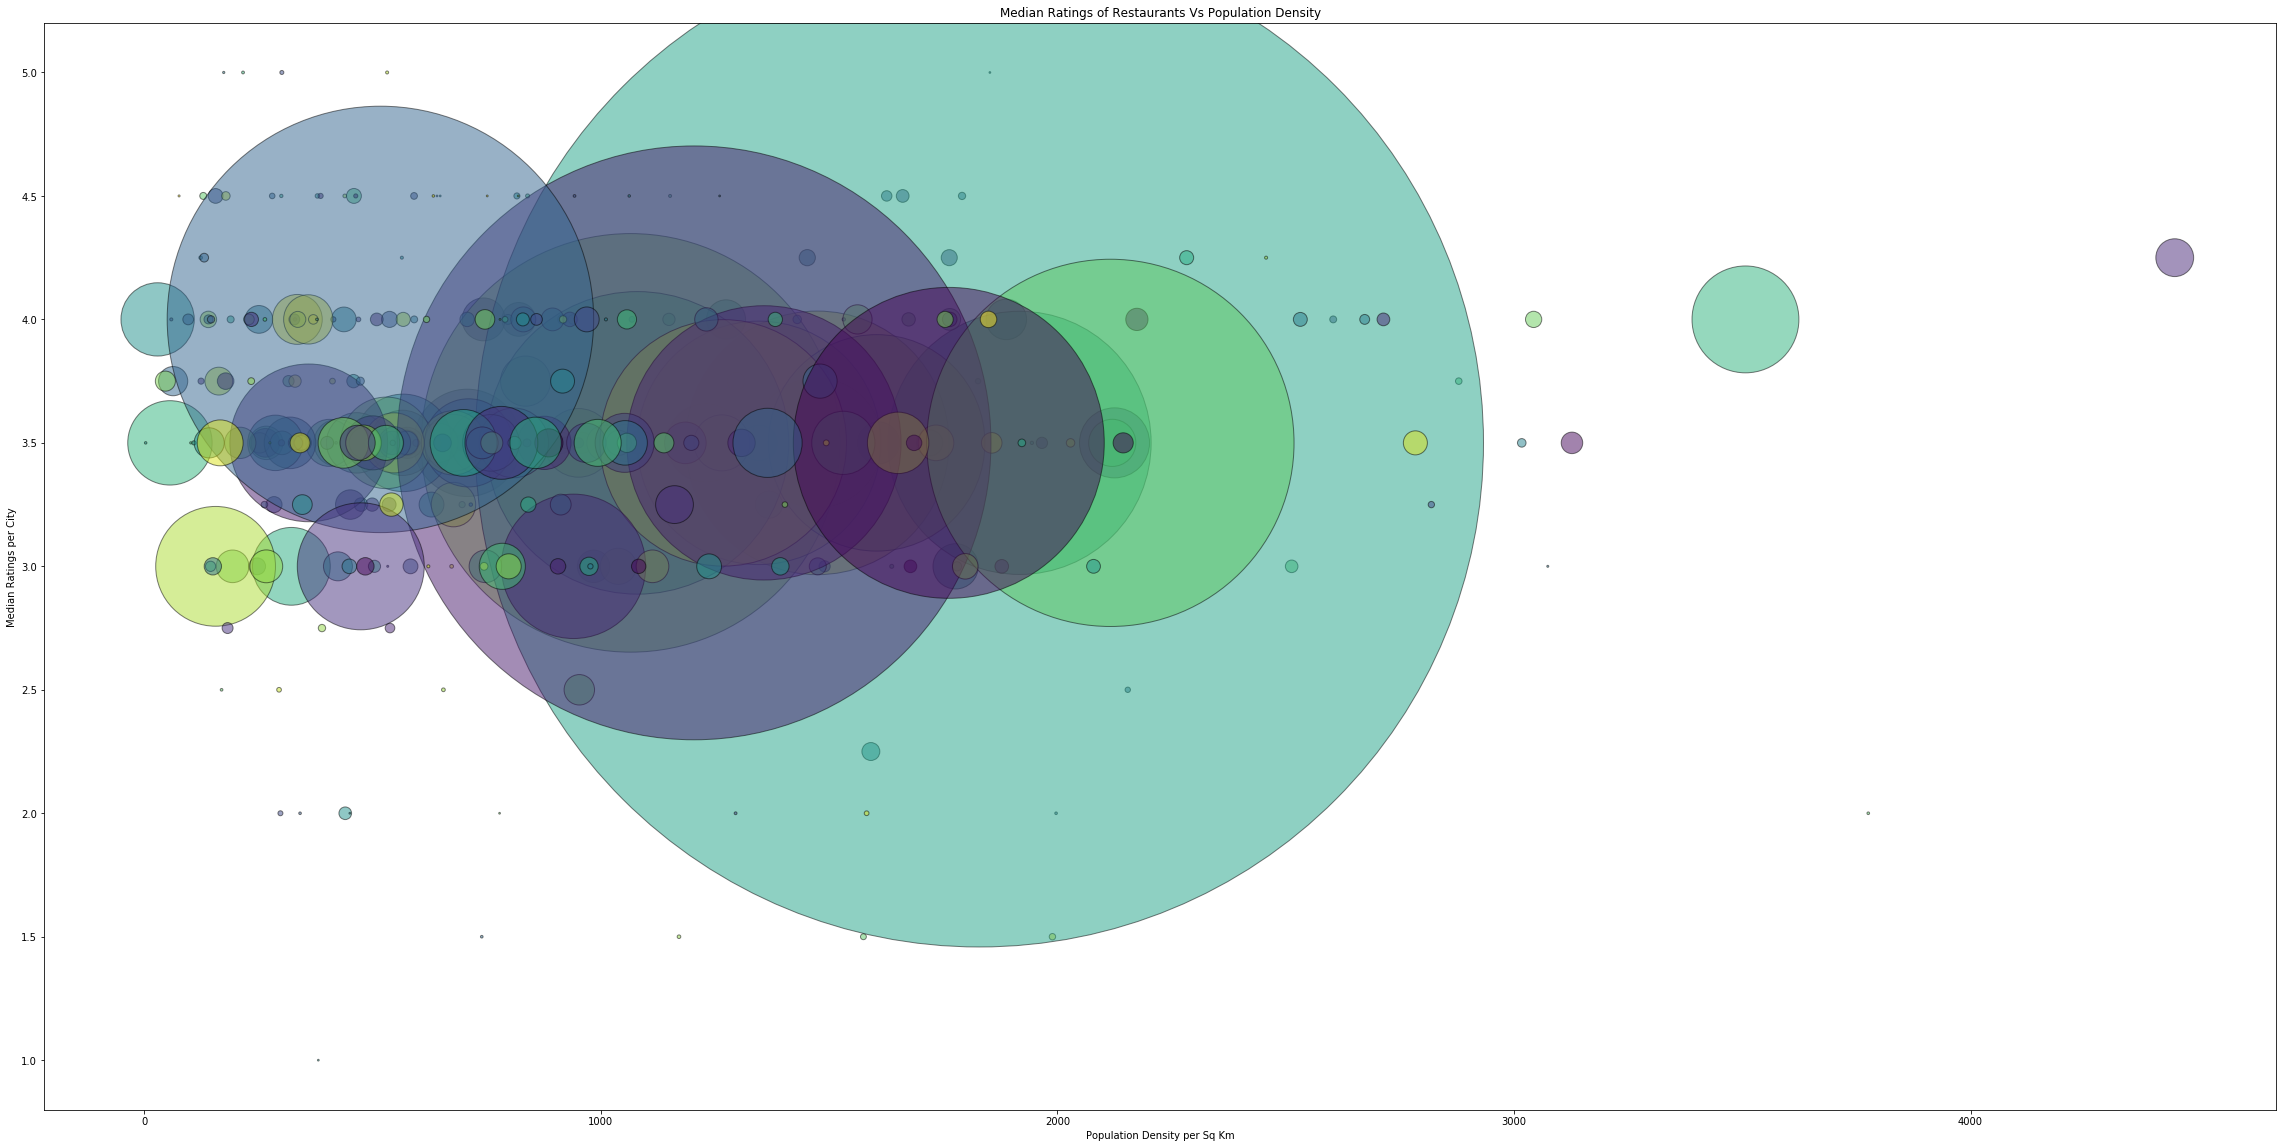

In [87]:
# plot the graph on population density and ratings
N = yelp_density_agg_df['City'].count()
x = yelp_density_agg_df['Density /SqKm']
y = yelp_density_agg_df['Ratings Median']
sizes = yelp_density_agg_df['Total Reviews']
colors = np.random.rand(N)

plt.figure(figsize=(40,20))
plt.scatter(x, y, s=sizes, c=colors, edgecolors='k', alpha=0.5,  cmap='viridis')

plt.xlabel('Population Density per Sq Km')
plt.ylabel('Median Ratings per City')
plt.title('Median Ratings of Restaurants Vs Population Density')



plt.show()